This is an Honors Contract exploring how Machine Learning (ML) root finding approximation compares to classical root finding methods. The goal is to test a variety of different traditional root finding approximation methods then to build an AI model to see if it can improve on many of the areas mathematictions can mess up the approximation with.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Define the different functions we will be using
def f(x):
  return math.exp(-x)-x #e^-x-x
#Define the derivative for the newton raphson method
def df(x):
  return -math.exp(-x)-1 #e^-x-1

In [ ]:
# Bisection method
def bisection(f, a, b, tol, max_iter=100):
  """
  Finds a root of f(x) in the interval [a, b] using the bisection method.
  Parameters:
  f: function - the function to find the root of
  a, b: float
  Interval endpoints with f(a) * f(b) < 0 (root must lie inside).
  tol: float
  Tolerance for stopping (default: 1e-6).
  max_iter: int
  Maximum number of iterations (default: 100).
  Returns:
  Approximate root of f(x), interations, and history
  """
  history = []
  #Check to see if the endpoints are roots
  if abs(f(a)) < tol:
      print(f"a is already a root")
      return a
  if abs(f(b)) < tol:
      print(f"b is already a root")
      return b
  # Check that the root exists in [a, b]
  if f(a) * f(b) >= 0:
      print("Bisection method fails: f(a) and f(b) must have opposite signs.")
      return None
  for i in range(max_iter):

      #Check to see if the endpoints are roots
      if abs(f(a)) < tol:
          print(f"Converged in {i+1} iterations.")
          return a
      if abs(f(b)) < tol:
          print(f"Converged in {i+1} iterations.")
          return b
      # Compute midpoint
      c = (a + b) / 2.0
      history.append(c)
      # Check if the midpoint is a root or close enough
      if abs(f(c)) < tol or (b - a) / 2.0 < tol:
          print(f"Converged in {i+1} iterations.")
          return c, i+1, history
  # Decide which subinterval contains the root
      if f(a) * f(c) < 0:
          b = c # Root is in [a, c]
      else:
          a = c # Root is in [c, b]

  print("Maximum iterations reached.")
  return (a + b) / 2.0, max_iter, history # Return best estimate

In [ ]:
#Newton Raphson method
def newton_raphson(f, df, x0, tol, max_iter = 100):
  """
  Finds a root of f(x) using Newton-Raphson method.
  Parameters:
  f: function - the function to find the root of
  df: function - the derivative of f(x)
  x0: float initial guess
  tol: float - Tolerance for stopping
  max_iter: int - mmaximum number of iterations

  returns:
  root, iterations, history
  """

  x = x0;
  history = [x0]

  for i in range(max_iter):
    fx = f(x)
    dfx = df(x)

    #Check if derivative is too small
    if abs(dfx) <1e-12:
      print("Newton-Raphson method fails: derivative is too small.")
      return None, i, history

    #Newton Raphson iteration
    x_new = x - fx/dfx
    history.append(x_new)

    #Check if root is close enough
    if abs(x_new - x) < tol or abs(f(x_new)) < tol:
      print(f"Converged in {i+1} iterations.")
      return x_new, i+1, history

  x = x_new
  print("Maximum iterations reached.")
  return x, max_iter, history

In [ ]:
#Secant method
def secant (f, x0, x1, tol = 1e-6, max_iter = 100):
  """
  Finds a root of f(x) using the secant method

  Parameters;
  f: function - the function to find the root of
  x0, x1: float - two initial guesses
  tol: float - tolerace for stopping
  max_iter: int - maximum number of iterations

  Returns:
  root, iterations, history
  """

  history = [x0, x1]

  for i in range(max_iter):
    fx0 = f(x0)
    fx1 = f(x1)

    #Check if denominator is too small
    if abs(fx1 - fx0) < 1e-12:
      print("Secant method fails: denominator is too small.")
      return None, i, history

    #Secant method iteration
    x2 = x1-fx1 * (x1-x0)/(fx1-fx0)
    history.append(x2)

    #Check if root is close enough
    if abs(x2 - x1) < tol or abs(f(x2)) < tol:
      print(f"Converged in {i+1} iterations.")
      return x2, i+1, history

    x0 = x1
    x1 = x2

  print("Maximum iterations reached.")
  return x1, max_iter, history

In [ ]:
#Comparison and Analysis
def compare_all_methods(f, df, a, b, x0, tol = 1e-6):
  """
  Compare all classical methods on the current function f(x)

  Parameters:
  f: function - the function to find the root of
  df: function - the derivative of f(x)
  a, b: float - interval endpoints
  x0: float - initial guess for Newton-Raphson and Secant
  tol: floar - tolerance
  """

  print("-"*70)
  print("Comparison of Classical Root-Finding Methods")
  # print(f"Function: f(x) = e^(-x) - x") # This will now be dynamic or removed
  print(f"Tolerance: {tol}")
  print("-"*70)

  results = {}

  #Bisection
  print("\n1. Bisection Method")
  print("-"*70)
  # Pass f to bisection
  root, iters, hist = bisection(f, a, b, tol)
  if root is not None:
    results['Bisection'] = {'root': root, 'iterations': iters, 'history': hist}
    print(f"Root: {root:.10f}")
    print(f"f(root): {f(root):.2e}")


  #Newton-Raphson
  print("\n2. Newton-Raphson Method")
  print("-"*70)
  # Pass f and df to newton_raphson
  root, iters, hist = newton_raphson(f, df, x0, tol)
  if root is not None:
    results['Newton-Raphson'] = {'root': root, 'iterations': iters, 'history': hist}
    print(f"Root: {root:.10f}")
    print(f"f(root): {f(root):.2e}")

  #Secant
  print("\n3. Secant Method")
  print("-"*70)
  # Pass f to secant
  root, iters, hist = secant(f, x0, x0+1.0, tol) # Added x1=x0+1.0 as secant needs two initial guesses
  if root is not None:
    results['Secant'] = {'root': root, 'iterations': iters, 'history': hist}
    print(f"Root: {root:.10f}")
    print(f"f(root): {f(root):.2e}")

  print("\n"+"="*70)
  print("Summary")
  print("-"*70)
  print(f"{'Method':<20}{'Root':<15}{'Iterations':<12}{'f(root)'}")
  print("-"*70)
  for method, data in results.items():
    print(f"{method:<20}{data['root']:15.10f}{data['iterations']:<12}{f(data['root']):.2e}")

  return results


"Plot results"
def plot_convergence(results, true_root=None):
  """Plot Convergence history for all methods"""
  plt.figure(figsize=(14, 5))


  #Plot 1: Iteration values
  plt.subplot(1, 2, 1)
  for method, data in results.items():
    plt.plot(data['history'],marker = 'o', label=method, linewidth = 2)

  if true_root:
    plt.axhline(y=true_root, color='black', linestyle='--', label='True Root')

  plt.xlabel('Iteration', fontsize = 12)
  plt.ylabel('x Value', fontsize = 12)
  plt.title('Convergence of Approximations', fontsize = 14)
  plt.legend()
  plt.grid(True, alpha = 0.3)
  #Plot 2: Error if the true root cannot be provided
  if true_root:
    plt.subplot(1, 2, 2)
    for method, data in results.items():
      errors = [abs(x-true_root) for x in data['history']]
      plt.semilogy(errors, marker = 'o', label=method, linewidth = 2)

      plt.xlabel('Iteration', fontsize = 12)
      plt.ylabel('Absolute Error', fontsize = 12)
      plt.title('Convergence Rate Comparison', fontsize = 14)
      plt.legend()
      plt.grid(True, alpha = 0.3)

  plt.tight_layout()
  plt.show()


**********************************************************************
Testing Classical Root Finding Methods
**********************************************************************


Test 1: f(x) = e^(-x)-x
----------------------------------------------------------------------
Comparison of Classical Root-Finding Methods
Tolerance: 1e-06
----------------------------------------------------------------------

1. Bisection Method
----------------------------------------------------------------------
Converged in 20 iterations.
Root: 0.5671434402
f(root): -2.35e-07

2. Newton-Raphson Method
----------------------------------------------------------------------
Maximum iterations reached.
Root: 0.5663110032
f(root): 1.30e-03

3. Secant Method
----------------------------------------------------------------------
Converged in 4 iterations.
Root: 0.5671432914
f(root): -1.57e-09

Summary
----------------------------------------------------------------------
Method              Root          

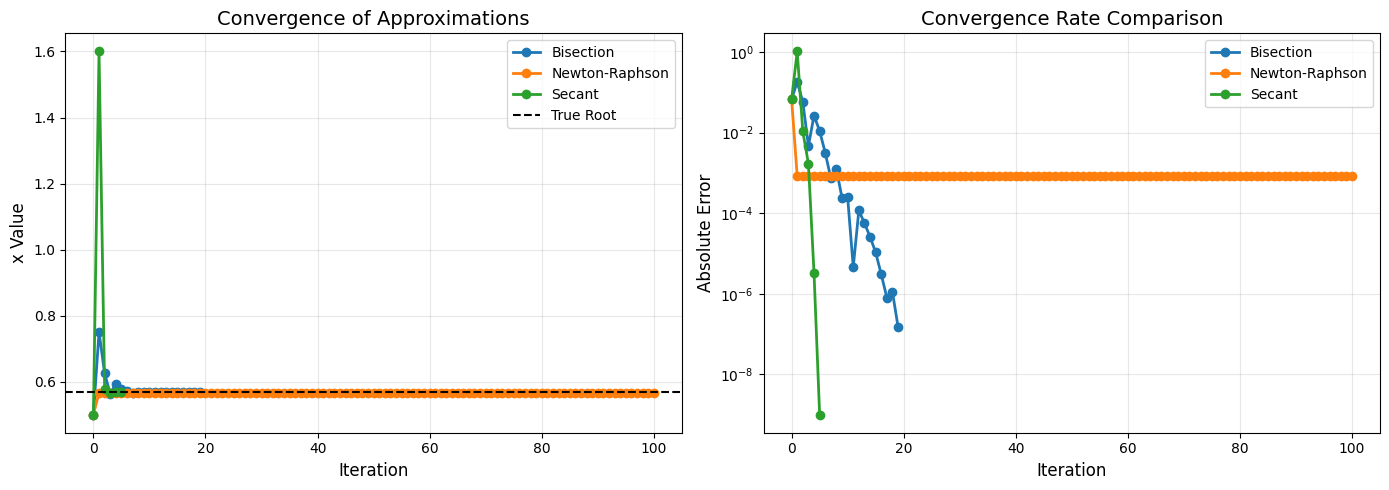



Test 2: f(x) = x^2-4
----------------------------------------------------------------------
Comparison of Classical Root-Finding Methods
Tolerance: 1e-06
----------------------------------------------------------------------

1. Bisection Method
----------------------------------------------------------------------
Converged in 22 iterations.
Root: 2.0000002384
f(root): 9.54e-07

2. Newton-Raphson Method
----------------------------------------------------------------------
Maximum iterations reached.
Root: 2.5000000000
f(root): 2.25e+00

3. Secant Method
----------------------------------------------------------------------
Converged in 4 iterations.
Root: 1.9999999987
f(root): -5.11e-09

Summary
----------------------------------------------------------------------
Method              Root           Iterations  f(root)
----------------------------------------------------------------------
Bisection              2.000000238422          9.54e-07
Newton-Raphson         2.5000000000100

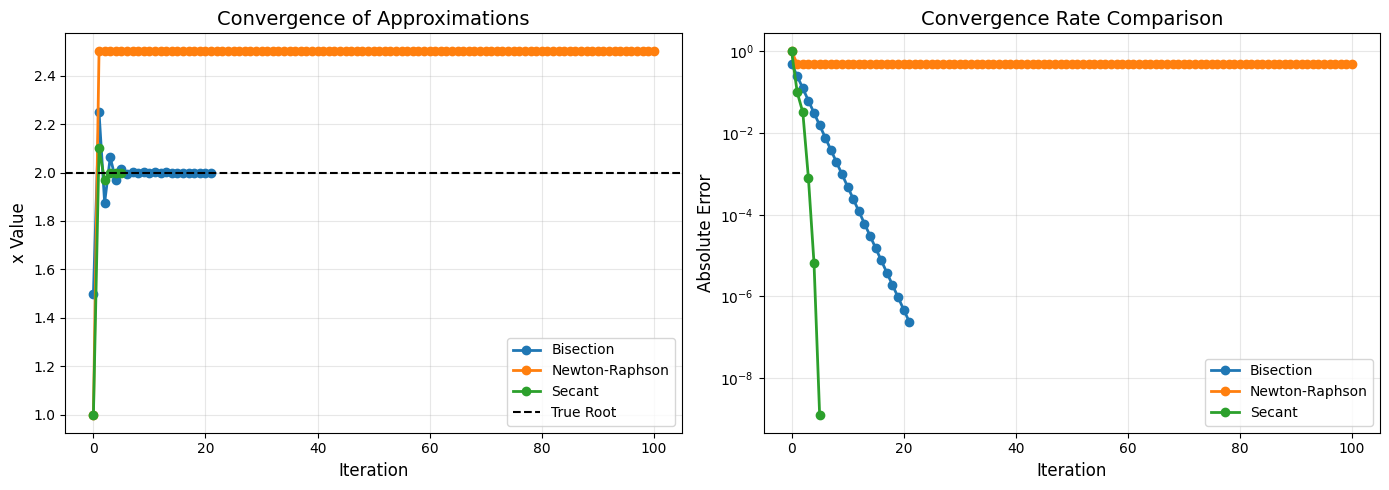



Test 3: f(x) = x^3 - x - 2
----------------------------------------------------------------------
Comparison of Classical Root-Finding Methods
Tolerance: 1e-06
----------------------------------------------------------------------

1. Bisection Method
----------------------------------------------------------------------
Converged in 20 iterations.
Root: 1.5213804245
f(root): 4.27e-06

2. Newton-Raphson Method
----------------------------------------------------------------------
Maximum iterations reached.
Root: 2.0000000000
f(root): 4.00e+00

3. Secant Method
----------------------------------------------------------------------
Converged in 6 iterations.
Root: 1.5213797146
f(root): 4.64e-08

Summary
----------------------------------------------------------------------
Method              Root           Iterations  f(root)
----------------------------------------------------------------------
Bisection              1.521380424520          4.27e-06
Newton-Raphson         2.00000000

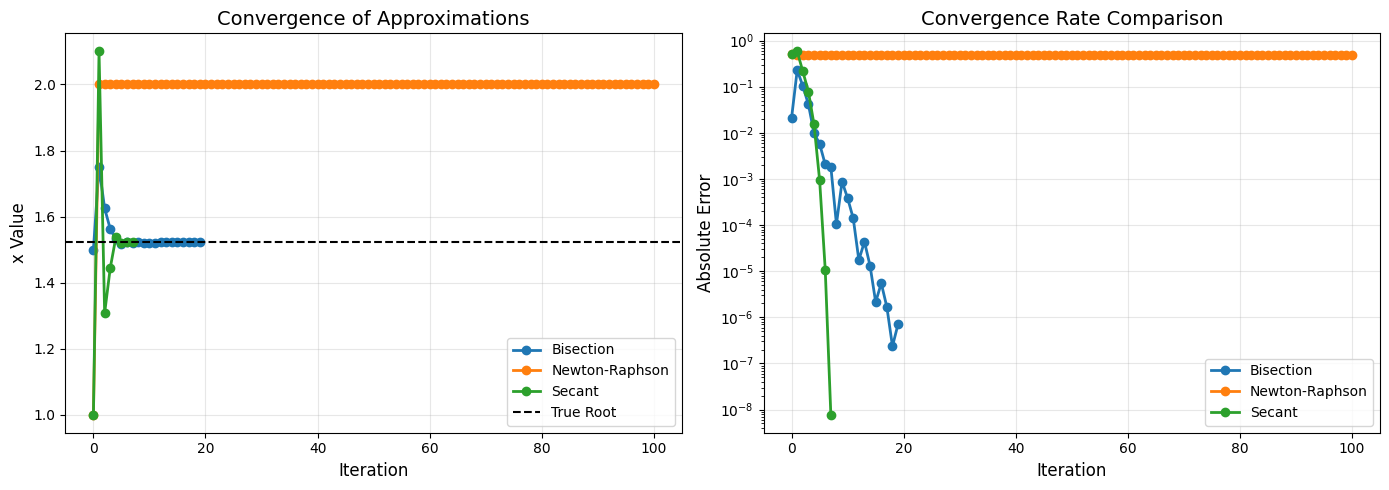

In [ ]:
#Test multiple functions
def test_multiple_functions():
  print("\n"+"*"*70)
  print("Testing Classical Root Finding Methods")
  print("*"*70)

  print("\n\nTest 1: f(x) = e^(-x)-x")
  print("="*70)

  def f(x):
    return math.exp(-x)-x
  def df(x):
    return -math.exp(-x)-1
  results = compare_all_methods(f, df, a=0, b=1, x0=0.5, tol=1e-6)
  plot_convergence(results, true_root = 0.567143290409784)

  #Redfine f and df temporarily
  print("\n\nTest 2: f(x) = x^2-4")
  print("="*70)
  def f(x):
    return x**2-4
  def df(x):
    return 2*x

  results2 = compare_all_methods(f, df, a=0, b=3, x0=1, tol = 1e-6)
  plot_convergence(results2, true_root = 2.0)

  print("\n\nTest 3: f(x) = x^3 - x - 2")
  print("="*70)

  #Redfine f and df temporarily
  def f(x):
    return x**3 - x - 2
  def df(x):
    return 3*x**2 - 1

  results3 = compare_all_methods(f, df, a=1,b=2,x0=1, tol=1e-6)
  plot_convergence(results3, true_root=1.521379706804568)


#Run it
test_multiple_functions()